In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib

In [3]:
#
# CHANGE HERE
#

experiment = "CLUSTERD" # REAL1
if experiment == "REAL1":
    inumber = 1
    bestit = 3
    delta = 0.85
    filename = f'follower_results_instance_real_{inumber}_{bestit}_delta{delta}.xlsx'
elif experiment == "CLUSTERD":
    inumber = '1_clustered'
    bestit = 1
    delta = 0.85
    filename = f'follower_results_instance_real_{inumber}_{bestit}_delta{delta}.xlsx'




df = pd.read_excel(f'instance_real/{inumber}/{filename}', sheet_name='y')
df = df[df['y']==1]
df.drop(columns=['y'], inplace=True)
df

,j,l,t
0,1,1,0
1,1,1,1
2,1,1,2
14,1,2,3
15,1,2,4
...,...,...,...
380,9,3,6
392,9,4,7
393,9,4,8
394,9,4,9


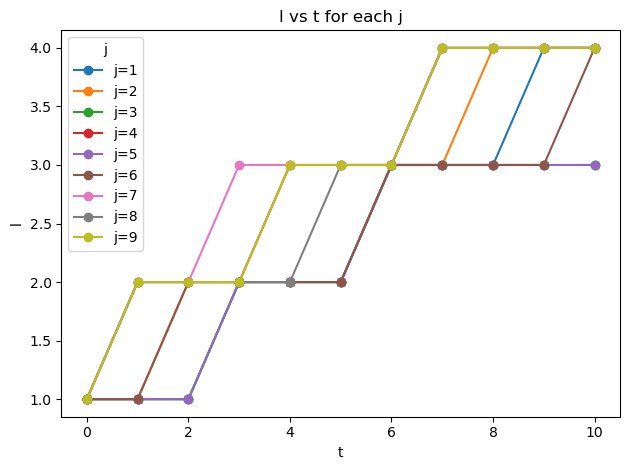

In [4]:
fig, ax = plt.subplots()
for key, grp in df.groupby('j'):
    ax.plot(grp['t'], grp['l'], marker='o', label=f'j={key}')
ax.set_xlabel('t')
ax.set_ylabel('l')
ax.legend(title='j')
plt.title('l vs t for each j')
plt.tight_layout()
plt.show()

In [5]:
groupdf = df.groupby(['l', 't']).agg({'j': 'count'}).reset_index()
groupdf 

,l,t,j
0,1,0,9
1,1,1,5
2,1,2,3
3,2,1,4
4,2,2,6
5,2,3,8
6,2,4,6
7,2,5,5
8,3,3,1
9,3,4,3


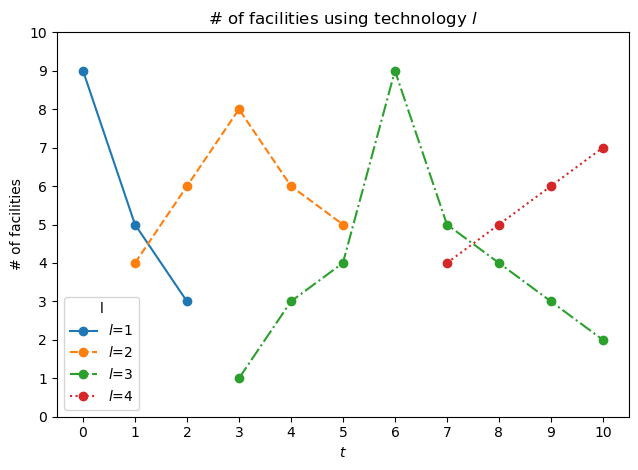

In [6]:
fig, ax = plt.subplots()
line_styles = {1:'-', 2:'--', 3:'-.', 4:':'}
for key, grp in groupdf.groupby('l'):
    ax.plot(grp['t'], grp['j'], marker='o', linestyle=line_styles[key], label=f'$l$={key}')
ax.set_xlabel('$t$')
ax.set_ylabel('# of facilities')
ax.legend(title='l')
plt.title('# of facilities using technology $l$')
plt.tight_layout()
ax.set_xticks(np.arange(0, 11, 1))
ax.set_yticks(np.arange(0, 11, 1))
plt.savefig(f'ireal{inumber}_levels.png', bbox_inches='tight', dpi=600)
plt.show()

In [7]:

dftable = pd.DataFrame(columns=['j', 'maxtechlevel', 'Bj0', 'investment', 'emissions', 'credit_selled', 'credit_purchased'])
dfBj0 = pd.read_excel(f'instance_real/{inumber}/{filename}', sheet_name='b')
dfBj0 = dfBj0[dfBj0['t']==0]
dfinvestment = pd.read_excel(f'instance_real/{inumber}/{filename}', sheet_name='xi')
dfemissions = pd.read_excel(f'instance_real/{inumber}/{filename}', sheet_name='e')
dfinvestment = dfinvestment.groupby('j').sum().reset_index()
dfemissions = dfemissions.groupby('j').sum().reset_index()
dfcredits = pd.read_excel(f'instance_real/{inumber}/{filename}', sheet_name='z')
dfdebits = dfcredits.groupby('jp').sum().reset_index()    
dfcredits = dfcredits.groupby('j').sum().reset_index()    


dftable['j'] = df['j'].unique()
dftable['maxtechlevel'] = df.groupby('j')['l'].max().values
dftable['Bj0'] = dfBj0['b'].apply(lambda x : round(x)).values
dftable['investment'] = dfinvestment['xi'].apply(lambda x : round(x)).values
dftable['emissions'] = dfemissions['e'].apply(lambda x : round(x)).values
dftable['credit_selled'] = dfcredits['z'].apply(lambda x : round(x)).values
dftable['credit_purchased'] = dfdebits['z'].apply(lambda x : round(x)).values

dftable


,j,maxtechlevel,Bj0,investment,emissions,credit_selled,credit_purchased
0,1,4,62802,169,2126,29,44
1,2,4,62802,204,2067,23,78
2,3,3,62802,74,2180,8,0
3,4,4,62802,180,1931,23,33
4,5,3,62802,108,2185,15,0
5,6,4,62802,169,2153,37,0
6,7,4,62802,204,1868,26,22
7,8,4,62802,157,1945,19,32
8,9,4,62802,180,1755,28,0


In [8]:
dftable.to_excel(f'table_result_ireal{inumber}_{bestit}.xlsx', index=False)